In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/placement (2).csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

<ipython-input-6-828fef352967>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-6-828fef352967>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


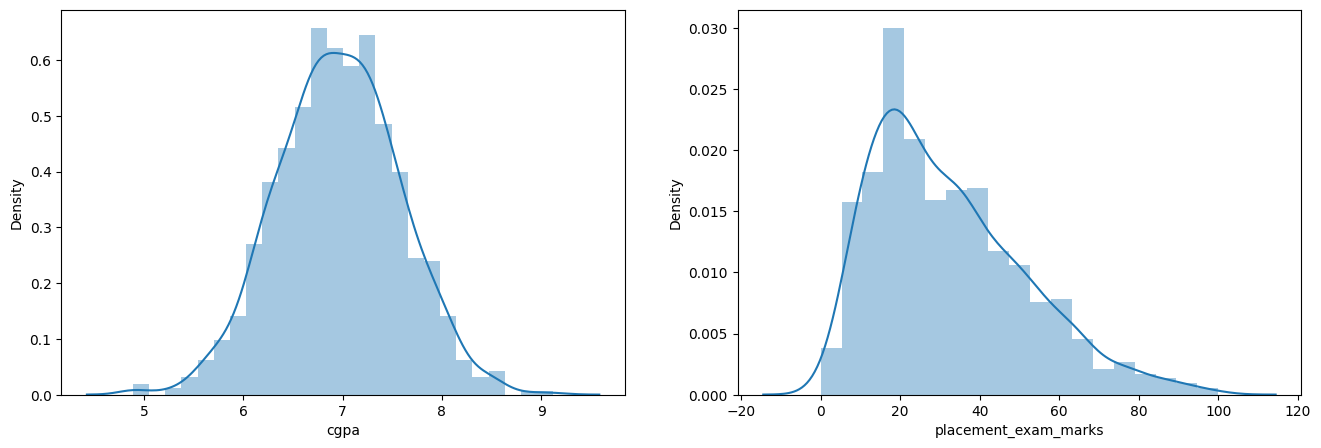

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [7]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [10]:
print("mean value of cgpa=",df['cgpa'].mean())
print("median value of cgpa=",df['cgpa'].median())
print("standard deviation of cgpa=",df['cgpa'].std())
print("variance of cgpa=",df['cgpa'].var())
print("minimum value of cgpa=",df['cgpa'].min())
print("maximum value of cgpa=",df['cgpa'].max())

mean value of cgpa= 6.96124
median value of cgpa= 6.96
standard deviation of cgpa= 0.6158978751323894
variance of cgpa= 0.37933019259259226
minimum value of cgpa= 4.89
maximum value of cgpa= 9.12


In [11]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

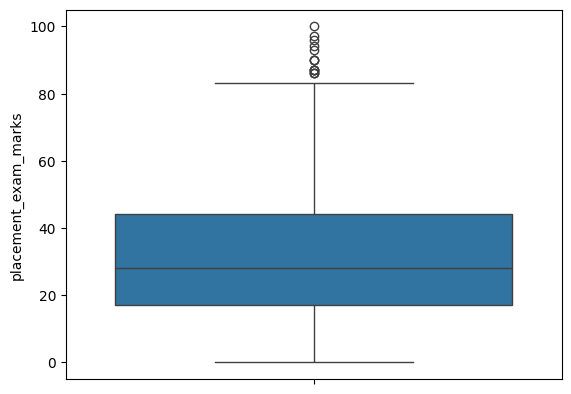

In [12]:
sns.boxplot(df['placement_exam_marks'])

# **Finding IQR**

In [13]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

percentile75

np.float64(44.0)

In [14]:
percentile25

np.float64(17.0)

In [15]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [17]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

upper_limit 84.5
lower_limit -23.5


# **Finding Outliers**

In [18]:
df[df['placement_exam_marks']> upper_limit]
df[df['placement_exam_marks']< upper_limit]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


# **Trimming**

In [19]:
new_df = df[df['placement_exam_marks']<upper_limit]
new_df.shape

(985, 3)

# **Comparing**

<ipython-input-21-67911168d447>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-21-67911168d447>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])
<ipython-input-21-67911168d447>:7: UserWarning: 

`distplot` is a deprecat

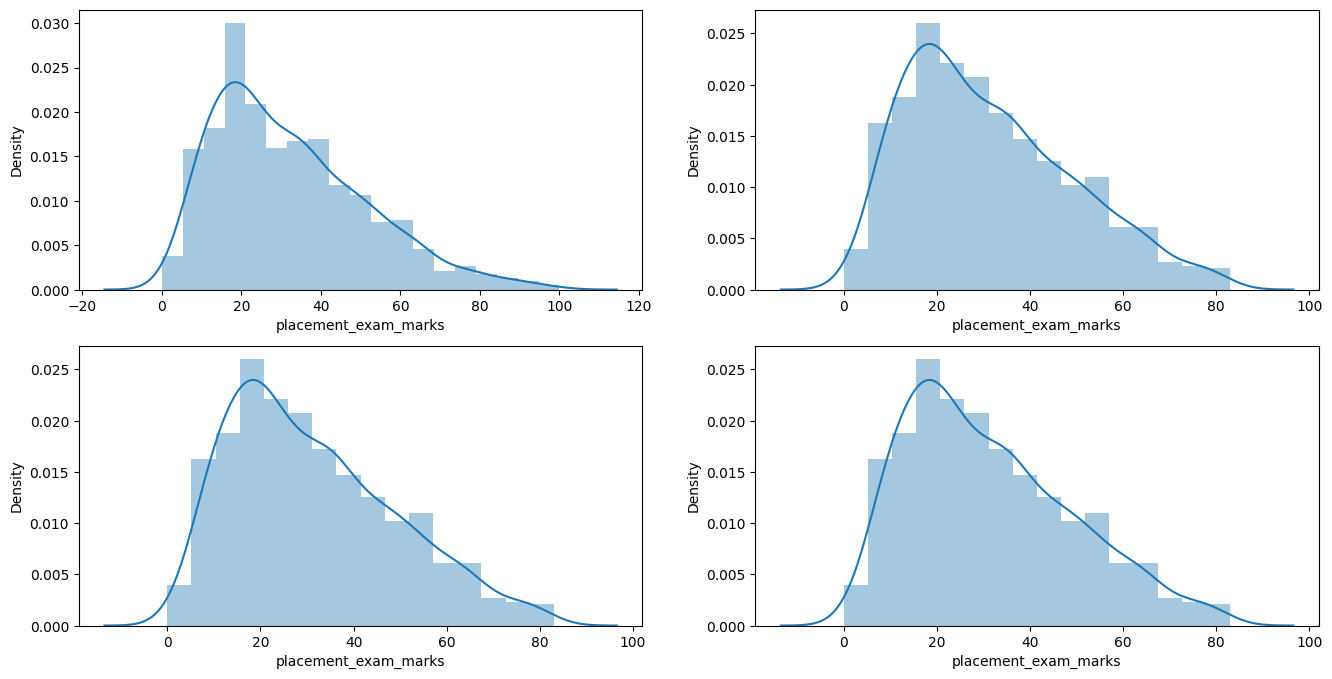

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.distplot(new_df['placement_exam_marks'])
plt.show()

# **Capping**

In [24]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks']= np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
   upper_limit,
    np.where(
       new_df_cap['placement_exam_marks']<lower_limit,
       lower_limit,
       new_df_cap['placement_exam_marks']
   )
)
new_df_cap.shape

(1000, 3)

# **Comparing**

<ipython-input-25-5ee3c59e872c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-25-5ee3c59e872c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])
<ipython-input-25-5ee3c59e872c>:7: UserWarning: 

`distplot` is a deprecat

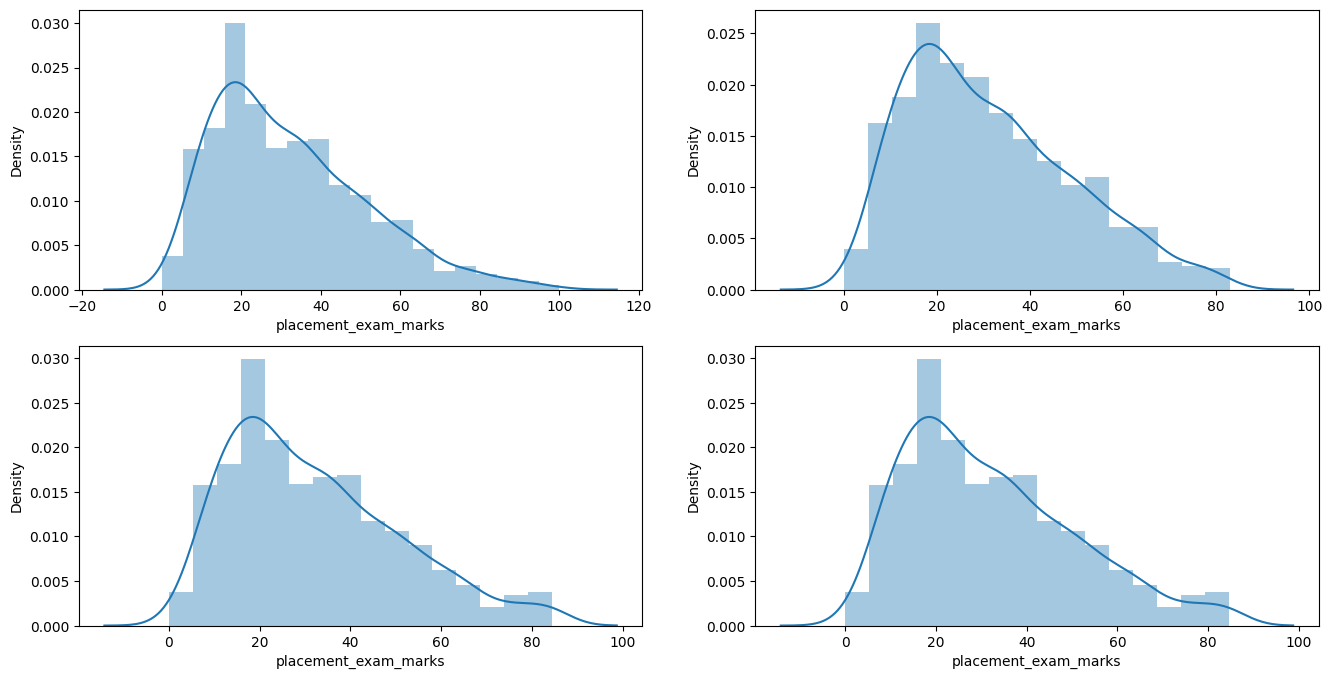

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2,2,4)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.show()